# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>Email ID:</u>  advaitchavan135@gmail.com
# CDAC PGDAI MACHINE LEARNING ASSIGNMENT__4

## 1. Loading the dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 

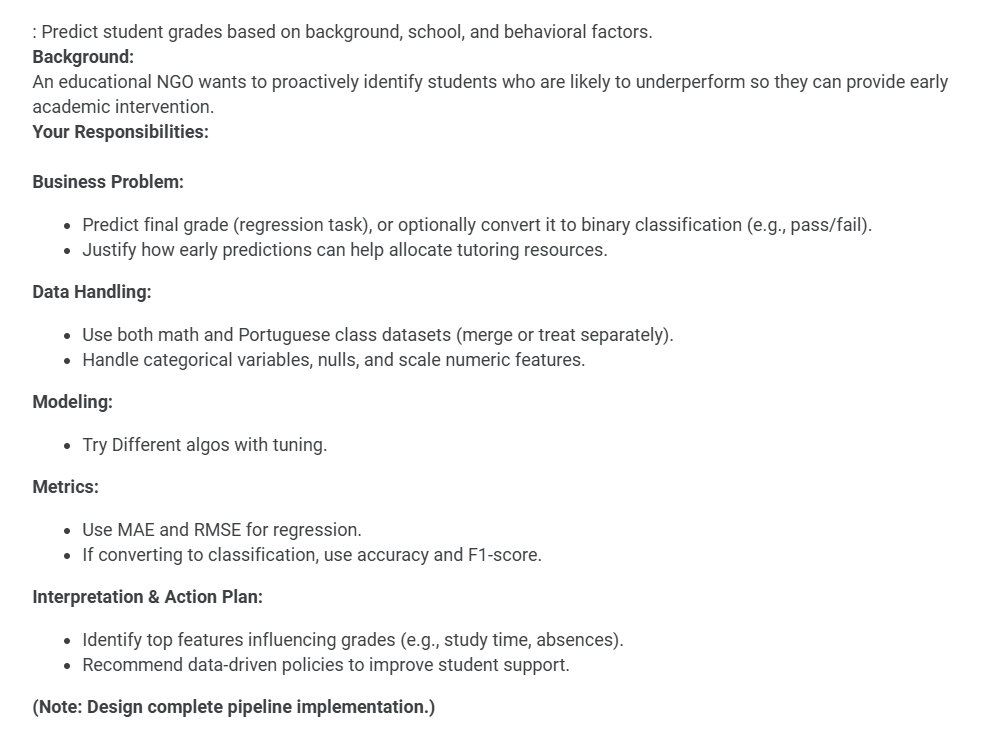

In [2]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 2. Define Preprocessing Steps

In [5]:
categorical_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic'
]
numeric_cols = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
]

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

## 3. Build the Modeling Pipeline

In [7]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

## 4. Split Data into Training and Testing Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 5. Train the Model

In [9]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences'])])),
                ('regressor', LinearRegression())])

## 6. Make Predictions

In [10]:
y_pred = model.predict(X_test)
# Convert predictions to a DataFrame for easier manipulation and plotting.
y_pred_df = pd.DataFrame(y_pred, columns=y.columns, index=y_test.index)

## 7. Evaluate the Model

In [11]:
print("\nModel Evaluation Metrics (per target):")
for col in y.columns:
    mae = mean_absolute_error(y_test[col], y_pred_df[col])
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred_df[col]))
    print(f"{col} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}")


Model Evaluation Metrics (per target):
G1 -> MAE: 2.08, RMSE: 2.72
G2 -> MAE: 2.15, RMSE: 2.84
G3 -> MAE: 2.15, RMSE: 2.86


## 8. Visualization: Actual vs. Predicted Values

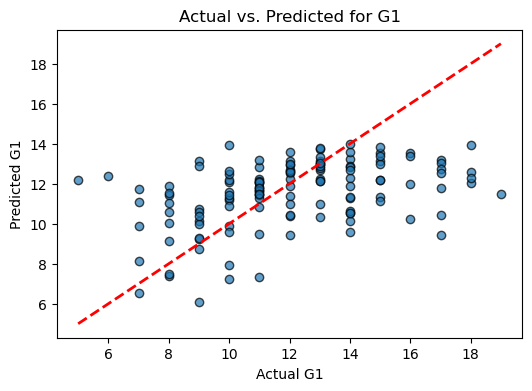

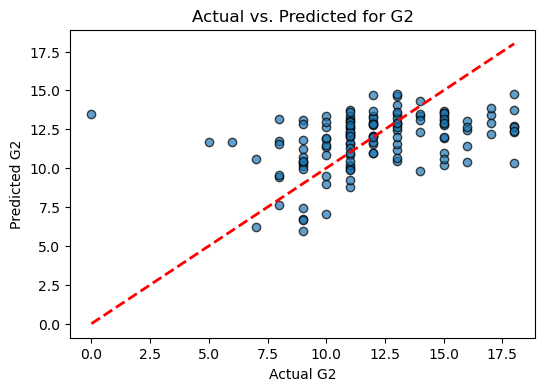

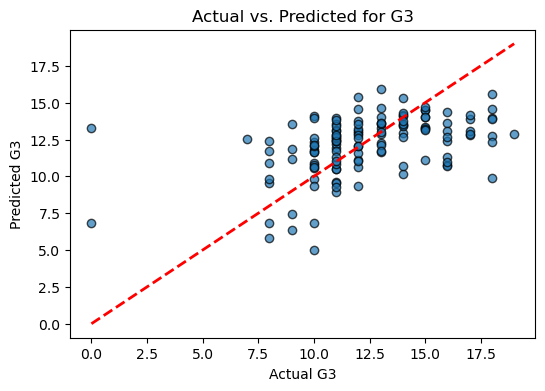

In [12]:
for col in y.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test[col], y_pred_df[col], alpha=0.7, edgecolors='k')
    plt.plot([y_test[col].min(), y_test[col].max()],
             [y_test[col].min(), y_test[col].max()], 'r--', lw=2)
    plt.xlabel("Actual " + col)
    plt.ylabel("Predicted " + col)
    plt.title(f"Actual vs. Predicted for {col}")
    plt.show()

## Here’s how early predictions translate into better resource allocation:

### Timely Intervention: By analyzing early grades (such as G1 and G2) and additional features, predictive models can flag students who are likely to struggle. When educators know which students might fall behind early on, they can step in with tutoring sessions, additional practice, or personalized guidance at a time when intervention is most effective. Addressing issues early prevents small learning gaps from widening into major academic setbacks. 

### Targeted Support: With early predictions, resources like one-on-one tutoring or small-group sessions can be directed specifically to those students who need additional help. Rather than implementing widespread interventions that may not benefit everyone, schools and NGOs can focus on students with the highest risk scores. This targeted approach means that limited tutoring resources are used where they can make the most significant impact.

### Efficient Use of Resources: Educational institutions typically operate within the constraints of limited budgets and time. Early prediction models help optimize the allocation process by ensuring that extra resources—be it time, specialized instructors, or learning materials—are channeled to students who have been identified as likely to underperform. This not only improves academic outcomes for these students but also enhances overall institutional efficiency.

### Continuous Monitoring and Adjustment: Early intervention frameworks allow for ongoing monitoring of student progress. If tutoring is provided based on early predictions, educators can track how these interventions influence subsequent performance. This feedback loop further refines the predictive model and helps adjust resources as needed, ensuring that support remains dynamic and responsive.

### Preventative Rather Than Reactive: It is much more manageable and cost-effective to prevent academic decline than to remediate severe underperformance later. When educators allocate tutoring resources proactively, they can often mitigate issues before they become entrenched, resulting in better student outcomes and a more positive learning environment overall.

In [13]:
from sklearn.inspection import permutation_importance

In [15]:
model_g3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_g3.fit(X_train, y_train["G3"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences'])])),
                ('regressor', LinearRegression())])

In [31]:
result = permutation_importance(
    model_g3, X_test, y_test["G3"],
    n_repeats=10, random_state=42, scoring='neg_mean_squared_error'
)

In [32]:
feature_names = X_test.columns

In [33]:
print("Number of original features:", len(feature_names))
print("Length of importance array:", result.importances_mean.shape[0])

Number of original features: 30
Length of importance array: 30


In [34]:
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

print("Top features influencing final grade (G3) based on original features:")
print(feature_importances.head(10))

Top features influencing final grade (G3) based on original features:
      feature  importance
14   failures    1.355358
20     higher    0.606146
0      school    0.363291
1         sex    0.286487
13  studytime    0.270740
22   romantic    0.111344
8        Mjob    0.087610
7        Fedu    0.076624
23     famrel    0.069619
2         age    0.062655


In [30]:
print("Shape of coefficients:", model_g3.named_steps['regressor'].coef_.shape)


Shape of coefficients: (56,)


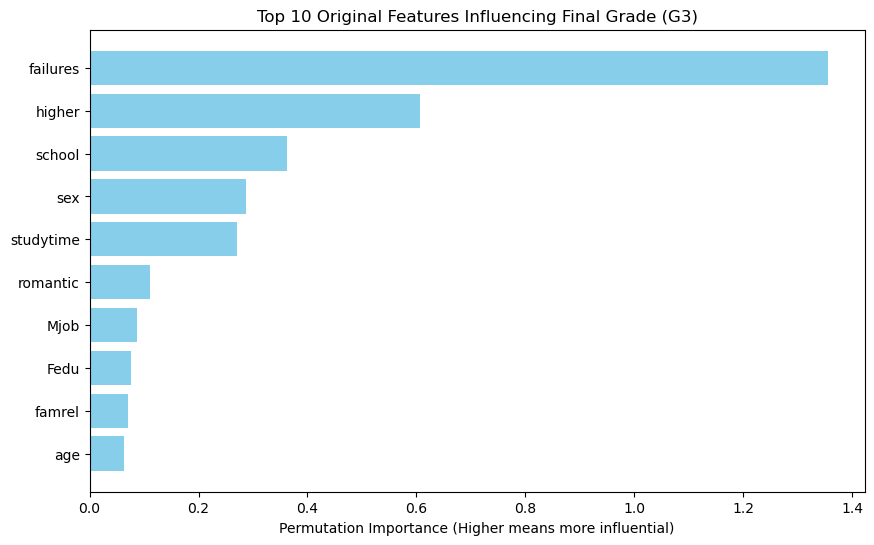

In [35]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.head(10)['feature'],
         feature_importances.head(10)['importance'],
         color='skyblue')
plt.xlabel("Permutation Importance (Higher means more influential)")
plt.title("Top 10 Original Features Influencing Final Grade (G3)")
plt.gca().invert_yaxis()
plt.show()

# Here are data-driven policies to improve student support based on these insights:

### 1.Early Intervention for Academic Failures: Since the number of past failures has the strongest influence on final grades, policies should prioritize early identification of students with academic setbacks. Implement dedicated remedial programs and personalized tutoring to help these students recover lost ground before they accumulate further failures.

### 2.Promote Aspirations for Higher Education: The “higher” feature suggests that aspirations regarding higher education are linked with better outcomes. Schools could introduce guidance counseling, college-preparation workshops, and mentorship programs that motivate and guide students toward further studies. This approach not only builds future readiness but also fosters a goal-oriented mindset.

### 3.Improve School Environment and Resources: The significant role of the “school” feature indicates that the learning environment matters. Investing in teacher training, modern facilities, and enriching extracurricular activities can create a more supportive atmosphere. Sharing best practices among schools can also help elevate overall performance.

### 4.Address Gender-Related Disparities: With “sex” among the top features, it's important to analyze if there are systematic differences or biases affecting male and female students. Tailored support programs and equitable resource allocation can ensure that both genders have similar opportunities to succeed.

### 5.Enhance Study Time Effectiveness: Since study time is a key factor, schools should monitor and encourage effective study habits. Establishing structured study sessions, providing quiet study areas, and offering study skills workshops can help students make the most of their available study time.

### 6.Support for Managing Personal Relationships: The influence of the “romantic” feature suggests that personal relationships might affect academic performance. Offering counseling services or workshops on time management and stress reduction could help students balance personal life with academic responsibilities.

### 7.Engage Parents and Guardians Effectively: Parental background factors (as seen with features like Mjob and Fedu) imply that family environment contributes to student success. Strengthening communication with parents through regular updates, interactive workshops, and engagement in school activities can create a more supportive ecosystem for the student.

### 8.Foster Healthy Family Dynamics: With family relationships (famrel) highlighting another major influence, schools might consider providing access to family counseling services and hosting workshops that educate families on creating supportive home learning environments. This holistic approach ensures that students receive reinforcement both at school and at home.

### 9.Tailored Support by Age Group: The feature “age” points to the possibility that different age groups have different needs. Schools should consider differentiated instructional strategies and support services—such as career counseling for older students and foundational skills support for younger ones—to cater to these specific needs.